# EDA "justica_eleitoral"

In [1]:
import pandas as pd
import numpy as np
import json
import os
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
import dask.dataframe as dd

# Seting data location

In [2]:
path_to_json = './base/justica_estadual/processos-tjpe'
json_files = glob(path_to_json + '/*.json')
print(f'{len(json_files)} files found.')

12 files found.


# Reading all jsons and concating in single DataFrame

In [3]:
df = pd.concat((pd.read_json(json_file) for json_file in json_files), axis=0)
print(df.shape)
df.head()

(59549, 5)


,millisInsercao,dadosBasicos,siglaTribunal,movimento,grau
0,1597213798652,"{'valorCausa': None, 'numero': '00002655220208...",TJPE,"[{'identificadorMovimento': None, 'tipoRespons...",G1
1,1597213428023,"{'valorCausa': None, 'numero': '00000509320208...",TJPE,"[{'identificadorMovimento': None, 'tipoRespons...",G1
2,1597207238559,"{'valorCausa': None, 'numero': '00001502420208...",TJPE,"[{'identificadorMovimento': None, 'tipoRespons...",G1
3,1597219550344,"{'valorCausa': None, 'numero': '00001476920208...",TJPE,"[{'identificadorMovimento': None, 'tipoRespons...",G1
4,1597218516383,"{'valorCausa': None, 'numero': '00001493920208...",TJPE,"[{'identificadorMovimento': None, 'tipoRespons...",G1


<AxesSubplot:ylabel='None'>

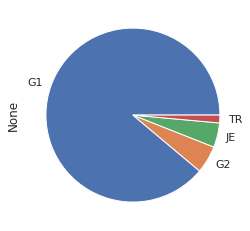

In [4]:
df.groupby('grau').size().plot.pie()

# Displaying samples

Columns 'dadosBasicos' and 'movimento' are still dicts objects, let's take a look in some samples

## dadosBasicos

In [9]:
df_dadosBasicos = []
samples = df['dadosBasicos'].sample(1)
for s in samples:
    df_dadosBasicos += pd.DataFrame.from_dict(s)
    print('=======')

#df['dadosBasicos'].type()

#df_dadosBasicos = pd.DataFrame.from_dict(df['dadosBasicos'])
#df_dadosBasicos

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

## movimento

In [ ]:
samples = df['movimento'].sample(5)
for s in samples:
    display(s)
    print('=======')